# Exploratory Data Analysis (EDA) on the Breast Cancer Dataset

In this section, we will explore the Breast Cancer Wisconsin dataset to understand its structure, summary statistics, distributions, and correlations. This analysis will help us gain insights into the data before building any models.

## 1. Dataset Overview

We first load the dataset and convert it to a DataFrame for easier analysis. We then examine the shape of the data, the first few rows, and the overall structure.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If the dataset is not already loaded, load it from scikit-learn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Create a DataFrame from the dataset
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = pd.Categorical.from_codes(cancer.target, cancer.target_names)

# Display basic information about the dataset
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [2]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   mean radius              569 non-null    float64 
 1   mean texture             569 non-null    float64 
 2   mean perimeter           569 non-null    float64 
 3   mean area                569 non-null    float64 
 4   mean smoothness          569 non-null    float64 
 5   mean compactness         569 non-null    float64 
 6   mean concavity           569 non-null    float64 
 7   mean concave points      569 non-null    float64 
 8   mean symmetry            569 non-null    float64 
 9   mean fractal dimension   569 non-null    float64 
 10  radius error             569 non-null    float64 
 11  texture error            569 non-null    float64 
 12  perimeter error          569 non-null    float64 
 13  area error               569 non-null    float64 
 14  smoothness

## 2. Statistical Summary

Next, we review the summary statistics of the dataset. This provides insight into the range, mean, standard deviation, and quartile distributions of the features.


In [3]:
# Statistical summary of the numerical features
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 3. Target Distribution

Understanding the balance of our target variable (malignant vs. benign) is important. We'll check the distribution of the target classes.


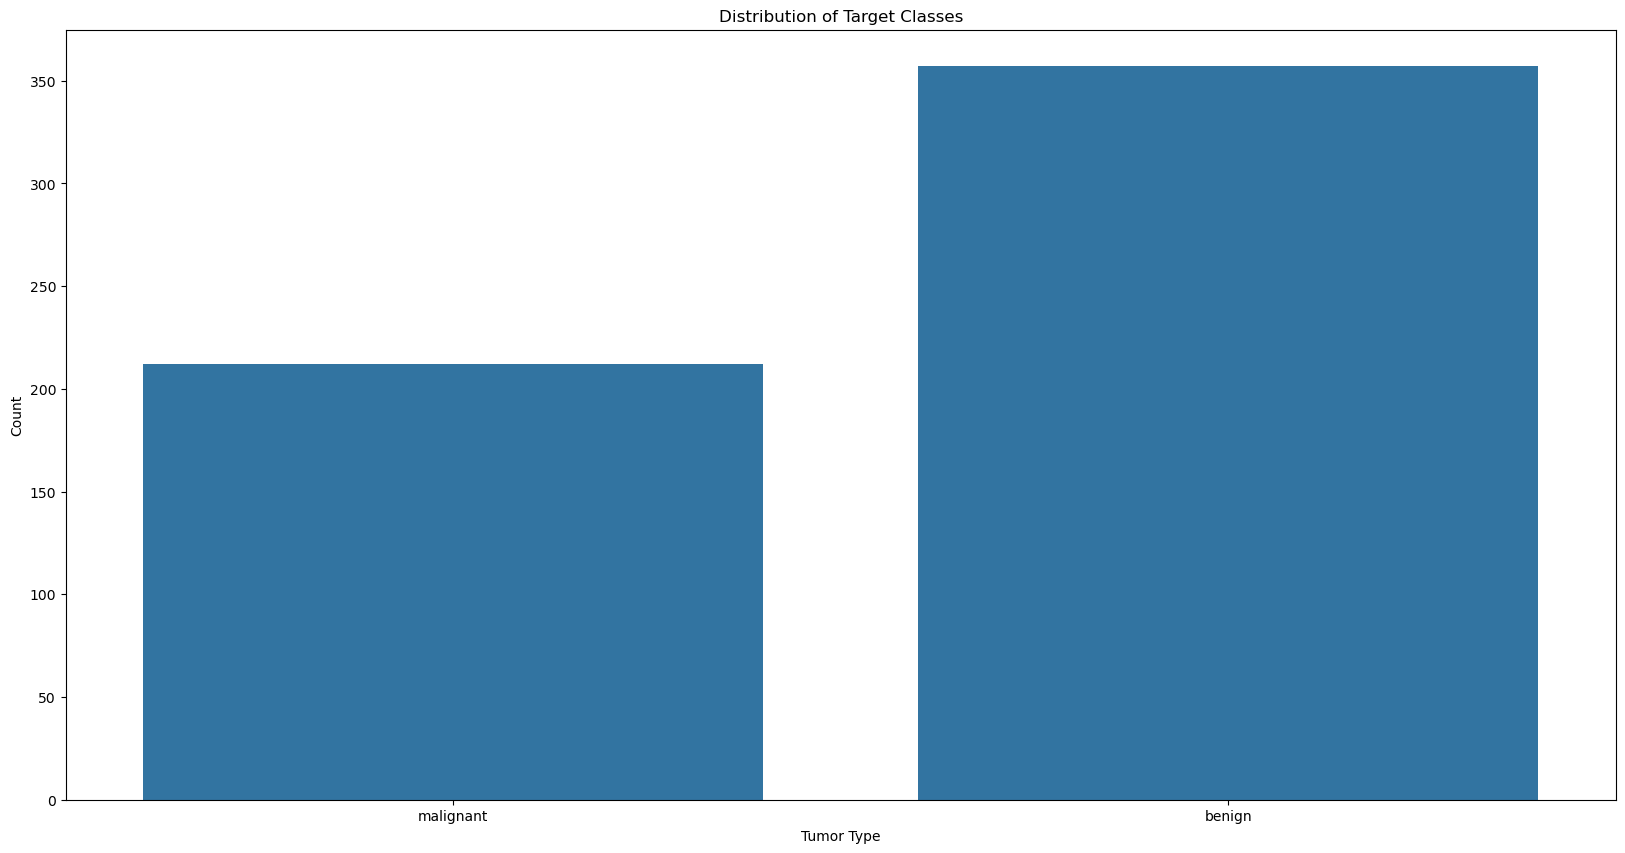

target
benign       357
malignant    212
Name: count, dtype: int64


In [ ]:
# Count plot of the target variable
plt.figure(figsize=(20,10))
sns.countplot(data=df_cancer, x='target')
plt.title("Distribution of Target Classes")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

# Also print the numerical counts
print(df_cancer['target'].value_counts())

## 4. Feature Distributions

Examining the distributions of some key features can provide insight into the spread and skewness of the data. Here we plot histograms for a subset of features.

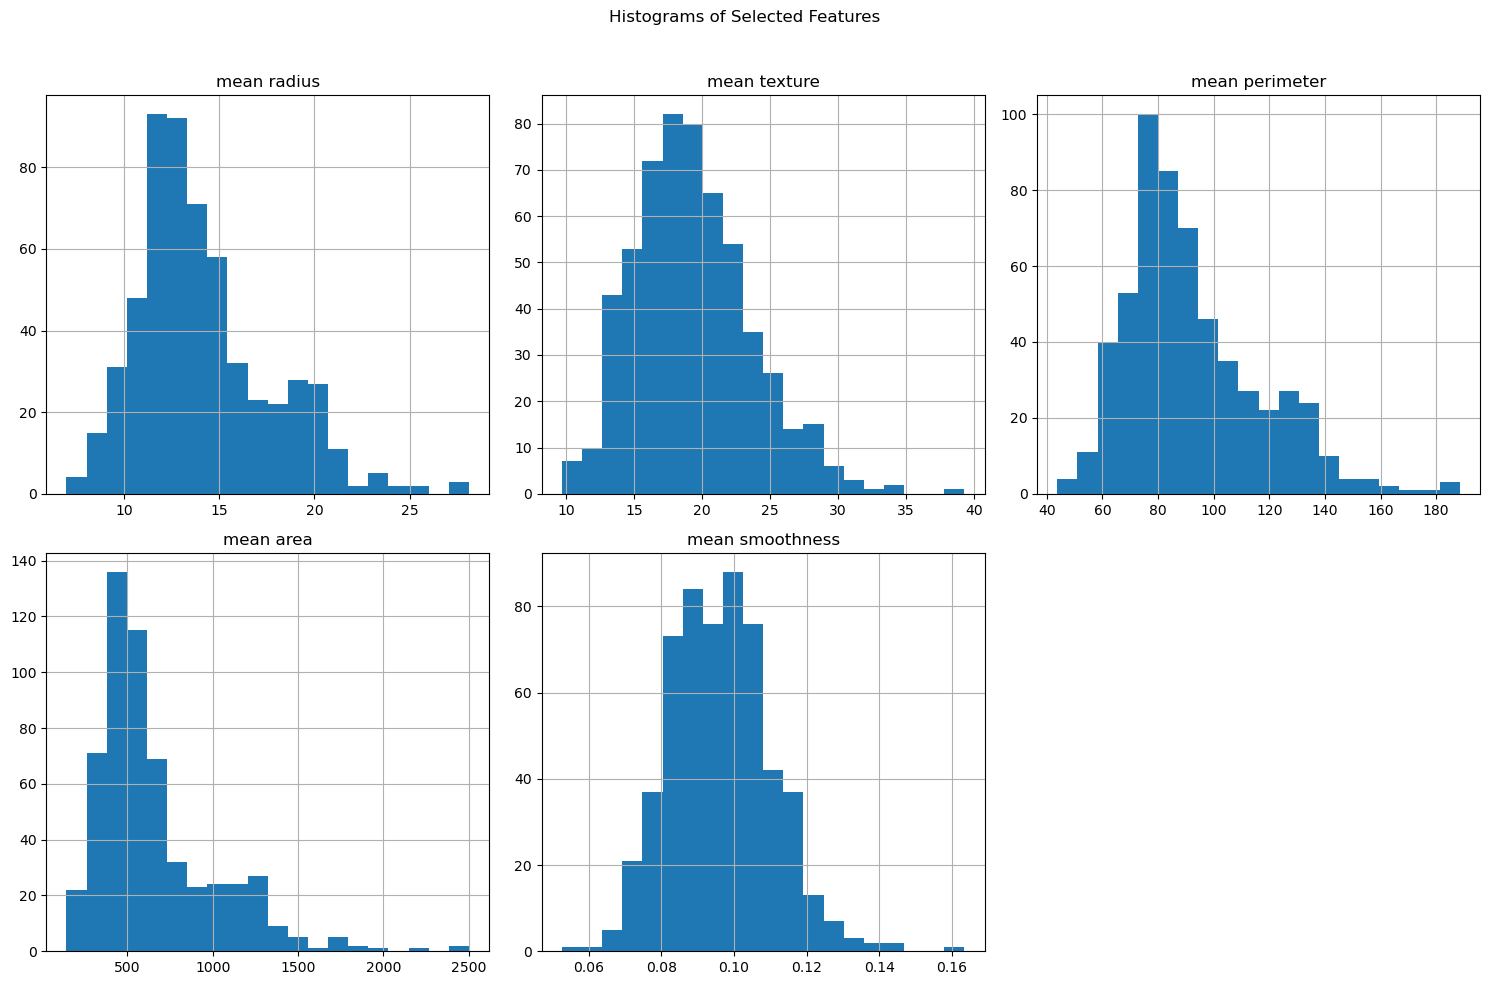

In [5]:
# Plot histograms for a selection of features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

df_cancer[selected_features].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Histograms of Selected Features")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 5. Correlation Analysis

A correlation heatmap helps us understand the relationships between different features. Highly correlated features may contain redundant information.


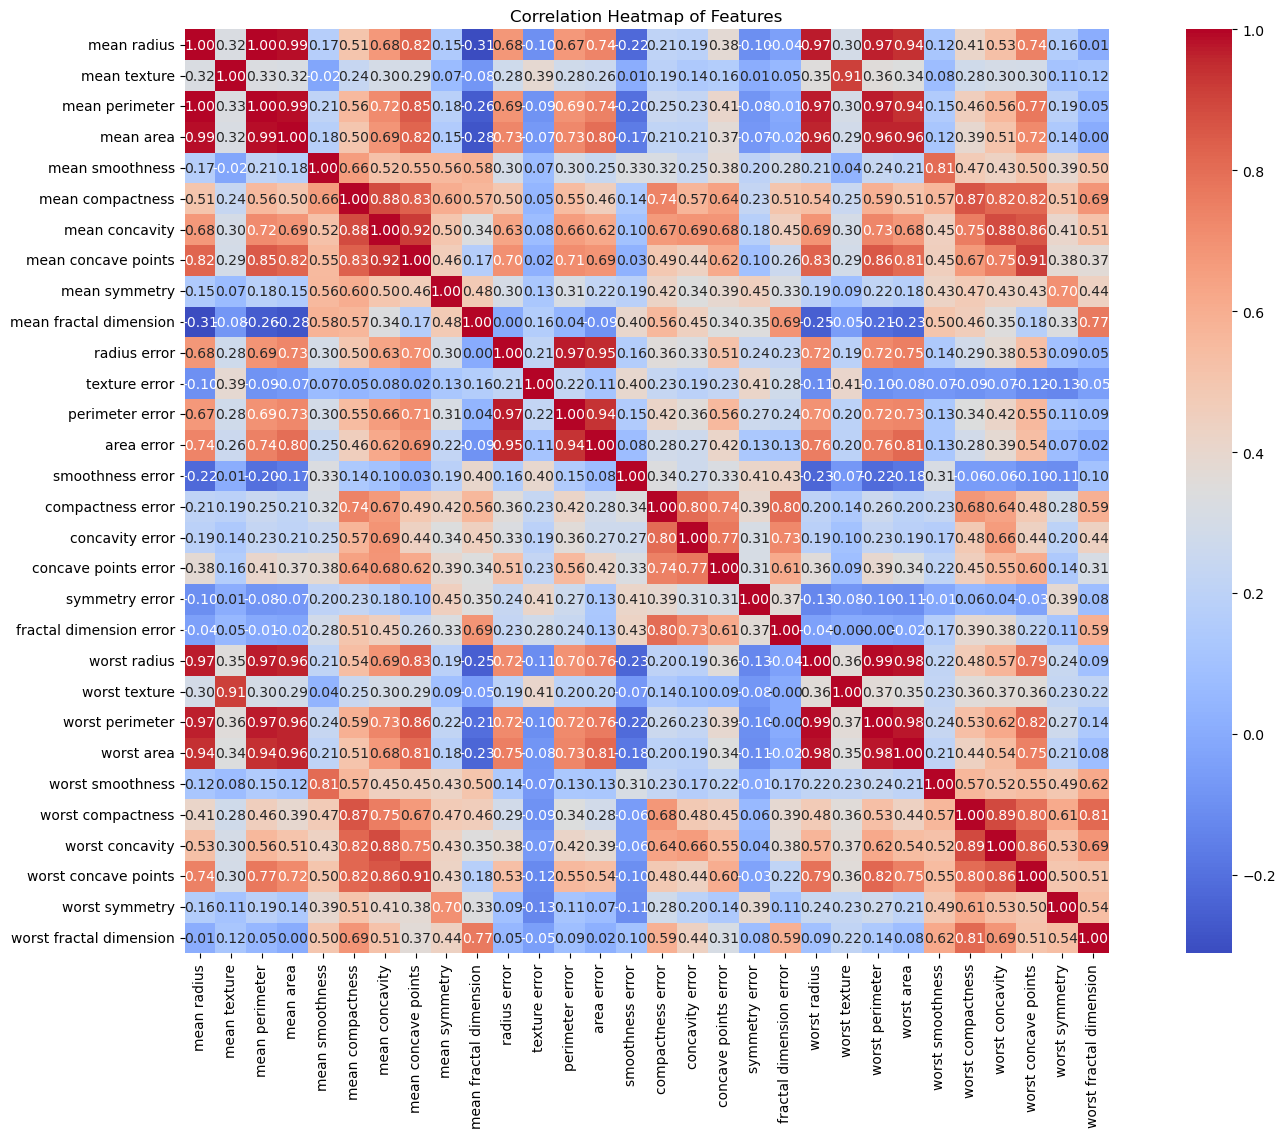

In [6]:
# Compute the correlation matrix
corr_matrix = df_cancer.drop(columns=['target']).corr()

# Plot the correlation heatmap using Seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

## 6. Pair Plot for a Subset of Features

To visually inspect relationships between a few features, we can create a pair plot. Because the dataset has many features, we select a small subset for clarity.


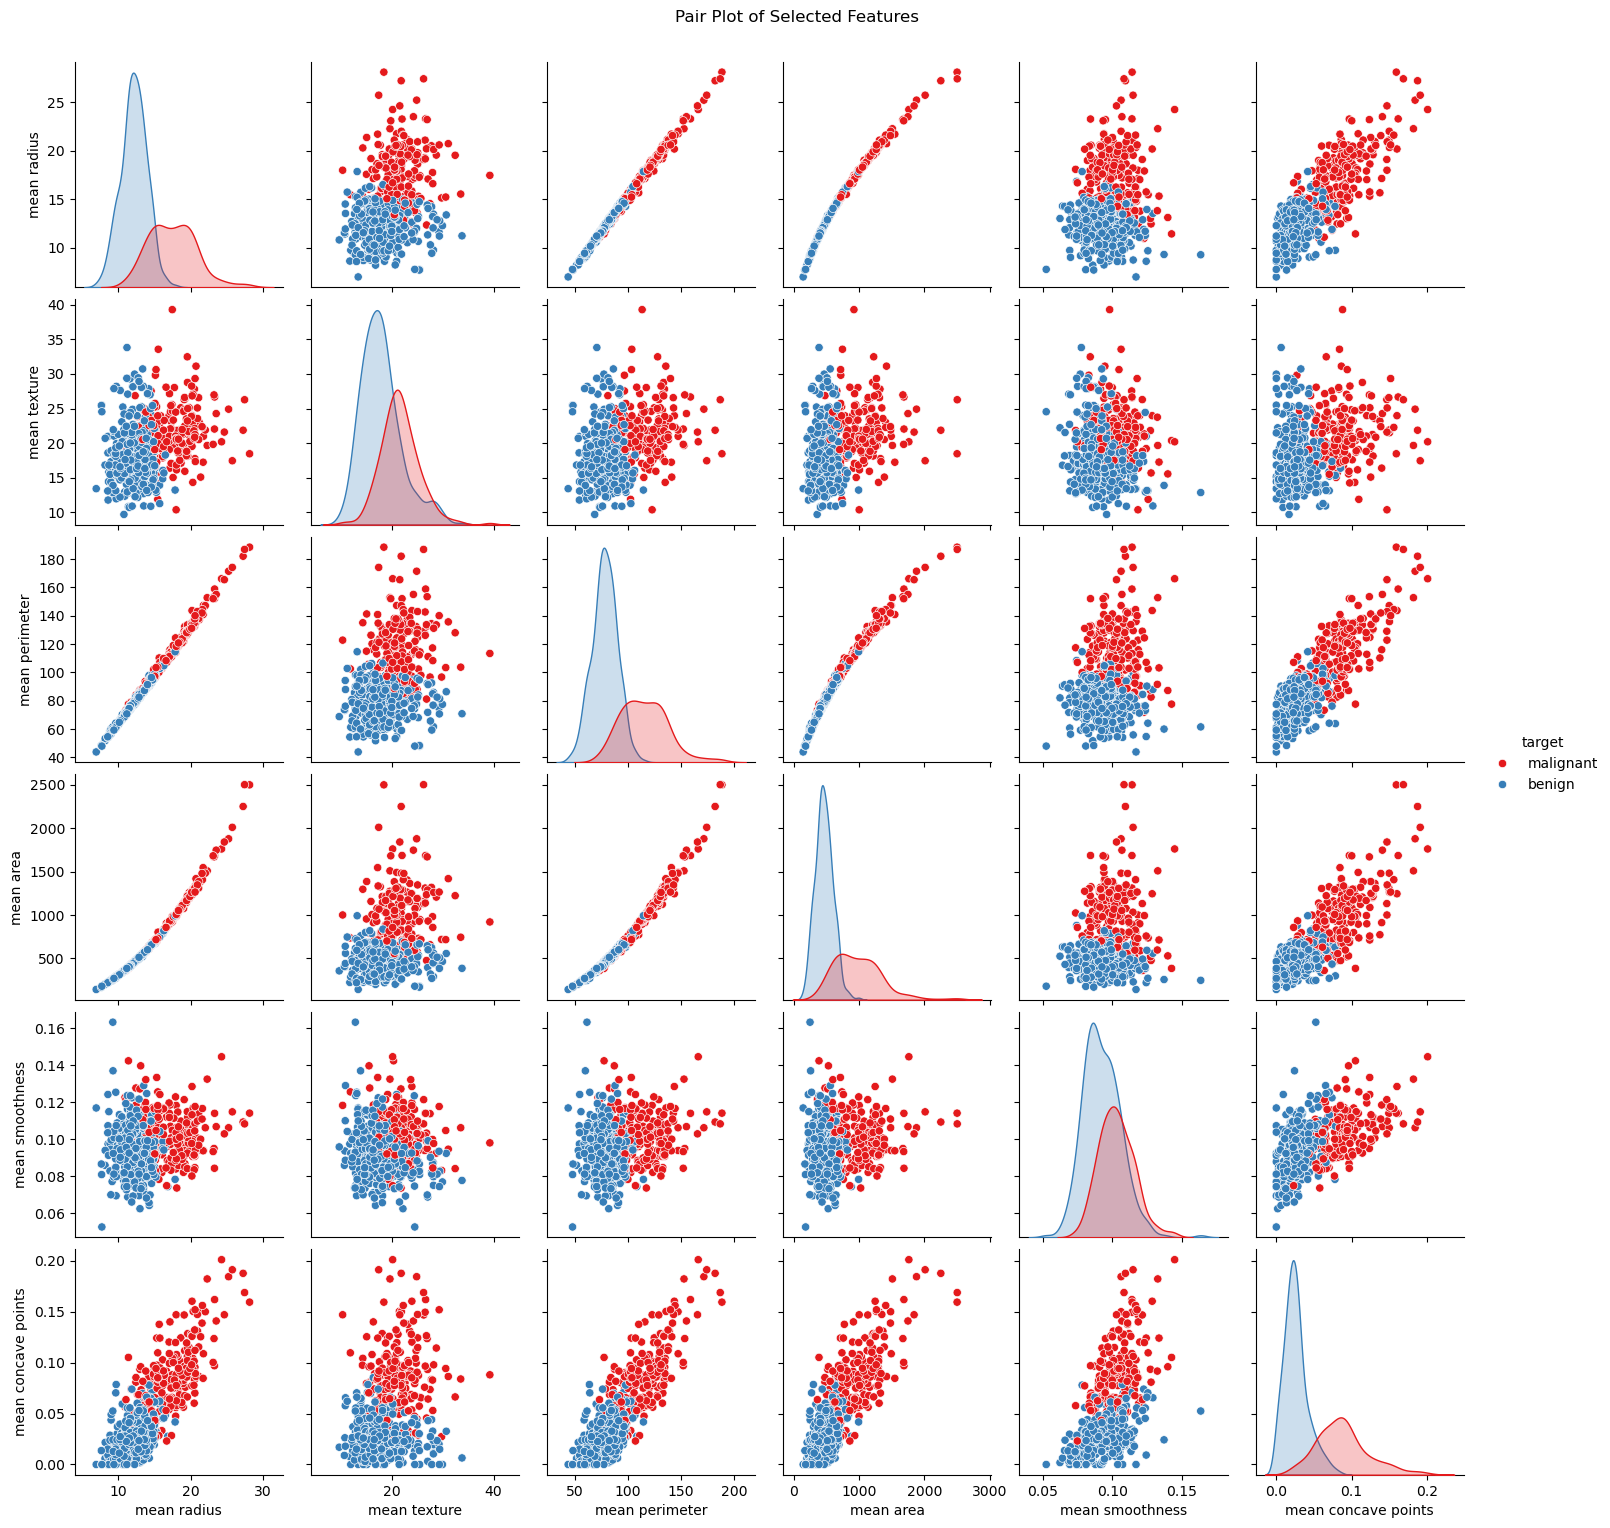

In [7]:
# Select a small subset of features for a pair plot
subset_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target', "mean concave points"]

# Create a pair plot with hue set to the target variable
sns.pairplot(df_cancer[subset_features], hue="target", palette="Set1", diag_kind="kde")
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

Through these steps, we have:

- **Reviewed the dataset structure and basic statistics.**
- **Visualized the distribution of the target variable.**
- **Plotted histograms to observe the distribution of key features.**
- **Examined the correlations between features using a heatmap.**
- **Generated a pair plot to inspect relationships between a subset of features.**

This EDA provides a solid foundation for understanding the data and will inform further preprocessing and modeling decisions.

## Conclusion

Our exploratory analysis of the Breast Cancer Wisconsin dataset revealed several key insights:

- **Dataset Overview:**
  The dataset consists of 569 samples with 30 features derived from fine needle aspirates of breast masses. The target variable indicates whether a tumor is malignant or benign.

- **Target Distribution:**
  The distribution of the target classes is relatively balanced, which suggests that the dataset does not suffer from severe class imbalance issues. This is beneficial for model training.

- **Feature Distributions:**
  Histograms of selected features (such as mean radius, mean texture, mean perimeter, mean area, and mean smoothness) show that the features generally exhibit a range of distributions, with some features displaying skewness. This indicates that feature scaling or transformation might be beneficial during preprocessing.

- **Correlation Analysis:**
  The correlation heatmap reveals that several features are highly correlated with one another. These relationships highlight potential redundancies within the dataset, suggesting that dimensionality reduction or feature selection techniques could be used to simplify the model without losing predictive power.

- **Pair Plot Insights:**
  The pair plot of a subset of features further confirms the relationships between variables and how they differentiate the target classes. This visual exploration supports the idea that some features have strong predictive capabilities in distinguishing between malignant and benign tumors.

Overall, this EDA provides a solid foundation for further data preprocessing, feature engineering, and modeling. By understanding the underlying structure and relationships within the data, we are better equipped to build robust and interpretable machine learning models. Happy analyzing and modeling!